In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import (balanced_accuracy_score, ConfusionMatrixDisplay, 
                            recall_score, precision_score, f1_score)

from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTEN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [42]:
def evaluation(X_test, y_test, preds, model):
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    
    b_acc = balanced_accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds, pos_label = 1)
    prec = precision_score(y_test, preds, pos_label = 1)
    f1 = f1_score(y_test, preds, pos_label = 1)

    print(f'balanced_accuracy: {b_acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

    return {
        'balanced_accuracy': b_acc,
        'recall': recall,
        'precision': prec,
        'f1_score': f1
    }

In [43]:
scores = []

In [44]:
# reading the youth model dataset 
youth_model = pd.read_csv("datasets/youth_model.csv")

youth_model.head()

,hmlsmorethan1Yr,dv_neglect,dv_physical,dv_physical_rel,dv_sexual_rel,subsabuse,drugabuse,SPA
0,1,1,1,1,0,0,0,4
1,1,0,0,0,1,0,0,4
2,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,4


# Normal Random Forest

In [45]:
# creating our X and y

features = ['dv_neglect', 'dv_physical', 'dv_physical_rel', 'dv_sexual_rel', 'subsabuse', 'drugabuse', 'SPA']

X = youth_model[features]
y = youth_model['hmlsmorethan1Yr']

In [46]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y)

In [47]:
# fitting the model
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# traim score
rf.score(X_train, y_train)

0.710334788937409

In [49]:
# test score
rf.score(X_test, y_test)

0.6472868217054264

The model shows sign of overfit since the train score is higher than the test score.

The model shows signs of overfit with the train score being higher than the test score.

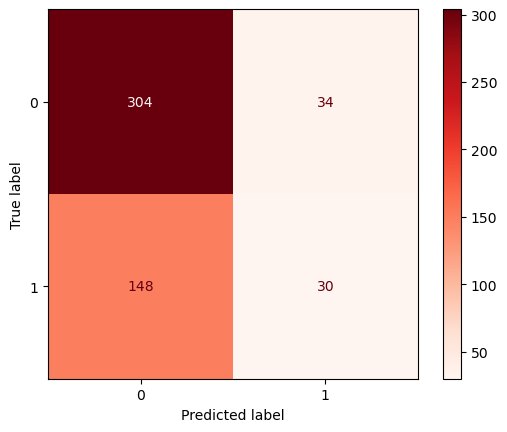

In [50]:
# Normal Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap = 'Reds');

In [51]:
preds1 = rf.predict(X_test)

balanced_accuracy: 0.5339738049331827
recall: 0.16853932584269662
precision: 0.46875
f1 score: 0.24793388429752064


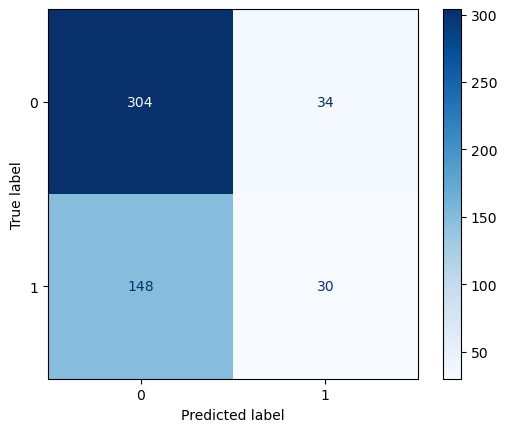

In [52]:
scores.append(evaluation(X_test, y_test, preds1, rf))

# Confusion Matrix of Random Forest
____

Youth who stayed homeless more than 1 year as our target / positive outcome:

* Our model correctly predicted 304 times that the youth did not stay homeless more than 1 year.
* Our model incorrectly predicted 34 times that youth stayed homeless more than 1 year when they actually did not.
* Our model incorrectly predicted 148 times that youth did not stay homeless more than 1 year when they actually did.
* Our model correctly predicted 30 times that youth stayed homeless more than 1 year.

The model shows more capability in identifying negative cases than positive cases.

* For balanced accuracy, the model's overall performance in terms of correctly classifying both positive and negative cases is moderate.
* For recall, the model correctly identified approximately 16% of the youth who stayed homeless more than 1 year.
* For out of all the cases predicted as youth staying homeless more than 1 year, approximately 47% were actually true positives.
* For the F1 score, it is heavily skewed towards in correctly identifying the negative cases (youth who did not stay homeless more than 1 year).

# Oversample with Hypertuned Random Forest

In [53]:
pipe = make_pipeline(RandomOverSampler(random_state=42),
                    RandomForestClassifier(random_state=42))

In [54]:
param_grid = {
    'randomoversampler__sampling_strategy': [.25, .5, .75, 1.0],
    #'randomforestclassifier__n_estimators': [50, 100, 150],  # Number of trees in the forest
    #'randomforestclassifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'randomforestclassifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    #'randomforestclassifier__bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

In [55]:
gs = GridSearchCV(pipe,
                 param_grid=param_grid,
                 cv=5,
                 n_jobs=-1)

In [56]:
gs.fit(X_train, y_train)

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\danie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\danie\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\danie\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 322, in fit
    Xt, yt = self._fit(X, y

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__min_samples_leaf': [1, 2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomoversampler__sampling_strategy': [0.25, 0.5,
                                                                  0.75, 1.0]})

In [57]:
# Train Score 
gs.score(X_train, y_train)

0.6851043182920912

In [58]:
# Test Score 
gs.score(X_test, y_test)

0.6569767441860465

The model shows sign of overfit with the train score being higher than the test score.

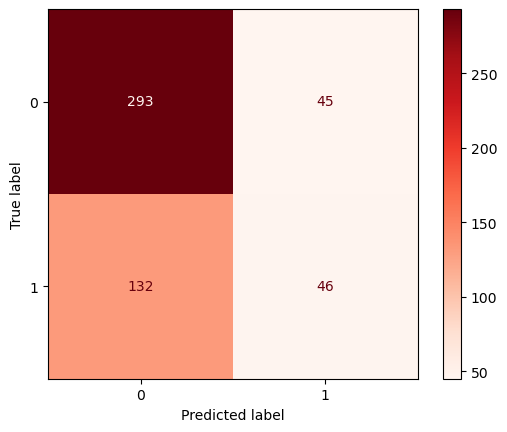

In [59]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap = 'Reds');

# Confusion Matrix of Random Forest with RandomOverSampler
____

Youth who stayed homeless more than 1 year as our target / positive outcome:

* Our model correctly predicted 293 times that the youth did not stay homeless more than 1 year.
* Our model incorrectly predicted 45 times that youth stayed homeless more than 1 year when they actually did not.
* Our model incorrectly predicted 132 times that youth did not stay homeless more than 1 year when they actually did.
* Our model correctly predicted 46 times that youth stayed homeless more than 1 year.

The model shows more capability in identifying negative cases than positive cases.


## Grid search with balanced accuracy as scoring metric for Oversampling



In [60]:
gs2 = GridSearchCV(pipe,
                 param_grid=param_grid,
                 cv=5,
                 n_jobs=-1, 
                 scoring='balanced_accuracy')

In [61]:
gs2.fit(X_train, y_train)

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\danie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\danie\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\danie\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 322, in fit
    Xt, yt = self._fit(X, y

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__min_samples_leaf': [1, 2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomoversampler__sampling_strategy': [0.25, 0.5,
                                                                  0.75, 1.0]},
             scoring='balanced_accuracy')

In [62]:
# train score
gs2.score(X_train, y_train)

0.6109167961134684

In [63]:
# test score
gs2.score(X_test, y_test)

0.5798816568047338

The model shows sign of overfit with the train score being higher than the test score.

balanced_accuracy: 0.5798816568047338
recall: 0.5
precision: 0.4362745098039216
f1 score: 0.46596858638743455


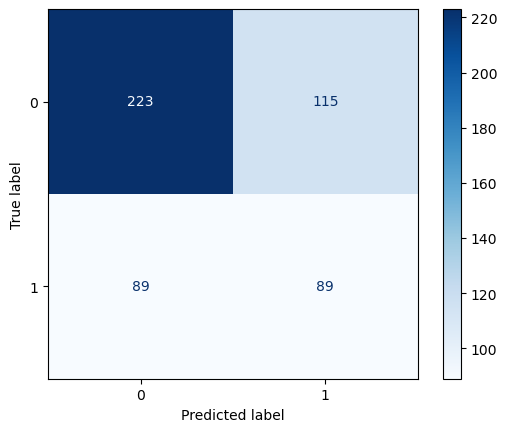

In [64]:
# making prediction
preds2 = gs2.predict(X_test)

# evaluating the model

scores.append(evaluation(X_test, y_test, preds2, gs2))

# Confusion Matrix of Random Forest with RandomOverSampler, GridSearch, and Balanced Accuracy
____

Youth who stayed homeless more than 1 year as our target / positive outcome:

* Our model correctly predicted 223 times that the youth did not stay homeless more than 1 year.
* Our model incorrectly predicted 115 times that youth stayed homeless more than 1 year when they actually did not.
* Our model incorrectly predicted 89 times that youth did not stay homeless more than 1 year when they actually did.
* Our model correctly predicted 89 times that youth stayed homeless more than 1 year.

The model shows more capability in identifying negative cases than positive cases.

* For balanced accuracy, the model's overall performance in terms of correctly classifying both positive and negative cases is moderate.
* For recall, the model correctly identified approximately 50% of the youth who stayed homeless more than 1 year.
* For out of all the cases predicted as youth staying homeless more than 1 year, approximately 47% were actually true positives.
* For the F1 score, it is moderately skewed towards in correctly identifying the negative cases (youth who did not stay homeless more than 1 year).

In [65]:
pd.DataFrame(scores, index=['rf', 'RandomOverSampler'])

,balanced_accuracy,recall,precision,f1_score
rf,0.533974,0.168539,0.468750,0.247934
RandomOverSampler,0.579882,0.500000,0.436275,0.465969


# SMOTEN Method for Hypertuned Random Forest
_____

Use SMOTEN method instead since we are dealing with all categorical features

In [66]:
pipe3 = make_pipeline(SMOTEN(random_state=42), RandomForestClassifier(random_state=42))

In [67]:
param_grid3 = {
    'smoten__k_neighbors' : [3, 5, 7],
    #'randomforestclassifier__n_estimators': [50, 100, 150],  # Number of trees in the forest
    #'randomforestclassifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'randomforestclassifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    #'randomforestclassifier__bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

In [68]:
gs3 = GridSearchCV(
    pipe3, 
    param_grid=param_grid3,
    cv=5,
    scoring='balanced_accuracy'
)

In [69]:
gs3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smoten', SMOTEN(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__min_samples_leaf': [1, 2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'smoten__k_neighbors': [3, 5, 7]},
             scoring='balanced_accuracy')

In [70]:
# train score
gs3.score(X_train, y_train)

0.6075291124988271

In [71]:
# test score
gs3.score(X_test, y_test)

0.5463233827538062

The model shows sign of overfit with the train score being higher than the test score.

balanced_accuracy: 0.5463233827538062
recall: 0.42696629213483145
precision: 0.4021164021164021
f1 score: 0.4141689373297003


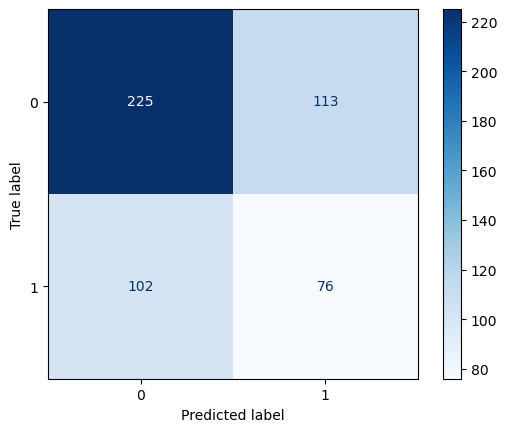

In [72]:
# create prediction
preds3 = gs3.predict(X_test)

# find out respective scores
scores.append(evaluation(X_test, y_test, preds3, gs3))

# Confusion Matrix of Random Forest with SMOTEN
____

Youth who stayed homeless more than 1 year as our target / positive outcome:

* Our model correctly predicted 225 times that the youth did not stay homeless more than 1 year.
* Our model incorrectly predicted 113 times that youth stayed homeless more than 1 year when they actually did not.
* Our model incorrectly predicted 102 times that youth did not stay homeless more than 1 year when they actually did.
* Our model correctly predicted 76 times that youth stayed homeless more than 1 year.

The model shows more capability in identifying negative cases than positive cases.

* For balanced accuracy, the model's overall performance in terms of correctly classifying both positive and negative cases is moderate.
* For recall, the model correctly identified approximately 43% of the youth who stayed homeless more than 1 year.
* For out of all the cases predicted as youth staying homeless more than 1 year, approximately 40% were actually true positives.
* For the F1 score, it is moderately skewed towards in correctly identifying the negative cases (youth who did not stay homeless more than 1 year).

In [73]:
pd.DataFrame(scores, index=['rf', 'RamdomOverSampler', 'SMOTEN'])

,balanced_accuracy,recall,precision,f1_score
rf,0.533974,0.168539,0.468750,0.247934
RamdomOverSampler,0.579882,0.500000,0.436275,0.465969
SMOTEN,0.546323,0.426966,0.402116,0.414169


## ADASYN with Random Forest

In [74]:
pipe4 = make_pipeline(ADASYN(random_state=42),
                    RandomForestClassifier(random_state=42))

In [75]:
param_grid4 = {
    'adasyn__n_neighbors':[3,5,7],
    #'randomforestclassifier__n_estimators': [50, 100, 150],  # Number of trees in the forest
    #'randomforestclassifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'randomforestclassifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    #'randomforestclassifier__bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

In [76]:
gs4 = GridSearchCV(
    pipe4, 
    param_grid=param_grid4, 
    scoring='balanced_accuracy',
    n_jobs=-1
)

In [77]:
gs4.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('adasyn', ADASYN(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'adasyn__n_neighbors': [3, 5, 7],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10]},
             scoring='balanced_accuracy')

In [78]:
# train score
gs4.score(X_train, y_train)

0.6267449255116189

In [79]:
# test score
gs4.score(X_test, y_test)

0.5480519912239877

The model shows signs of overfit with the train score being higher than the test score.

balanced_accuracy: 0.5480519912239877
recall: 0.5842696629213483
precision: 0.38661710037174724
f1 score: 0.46532438478747207


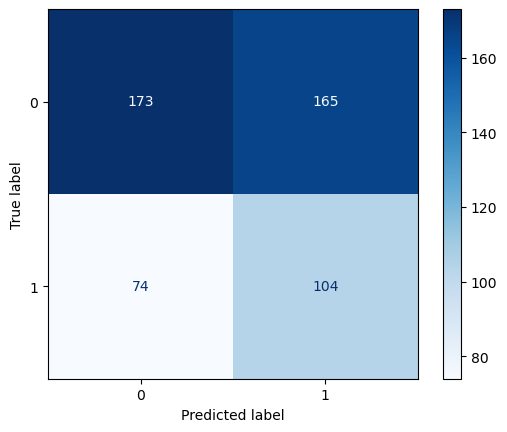

In [80]:
# create prediction
preds4 = gs4.predict(X_test)

# find out respective scores
scores.append(evaluation(X_test, y_test, preds4, gs4))

# Confusion Matrix of Random Forest with ADASYN
____

Youth who stayed homeless more than 1 year as our target / positive outcome:

* Our model correctly predicted 173 times that the youth did not stay homeless more than 1 year.
* Our model incorrectly predicted 165 times that youth stayed homeless more than 1 year when they actually did not.
* Our model incorrectly predicted 74 times that youth did not stay homeless more than 1 year when they actually did.
* Our model correctly predicted 104 times that youth stayed homeless more than 1 year.

The model shows more capability in identifying negative cases than positive cases.

* For balanced accuracy, the model's overall performance in terms of correctly classifying both positive and negative cases is moderate.
* For recall, the model correctly identified approximately 58% of the youth who stayed homeless more than 1 year.
* For out of all the cases predicted as youth staying homeless more than 1 year, approximately 39% were actually true positives.
* For the F1 score, it is moderately skewed towards in correctly identifying the negative cases (youth who did not stay homeless more than 1 year).

In [81]:
pd.DataFrame(scores, index = ['rf', 'RandomOverSampler',
                             'SMOTEN', 'ADASYN'])

,balanced_accuracy,recall,precision,f1_score
rf,0.533974,0.168539,0.468750,0.247934
RandomOverSampler,0.579882,0.500000,0.436275,0.465969
SMOTEN,0.546323,0.426966,0.402116,0.414169
ADASYN,0.548052,0.584270,0.386617,0.465324


# Random Forest with Overweighing

In [82]:
rf5 = RandomForestClassifier(random_state=42, class_weight='balanced')

rf5.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [83]:
# train score
rf5.score(X_train, y_train)

0.6215429403202329

In [84]:
# test score
rf5.score(X_test, y_test)

0.5426356589147286

The model shows sign of overfit with the train score higher than the test score.

balanced_accuracy: 0.535203776344658
recall: 0.5112359550561798
precision: 0.37916666666666665
f1 score: 0.4354066985645933


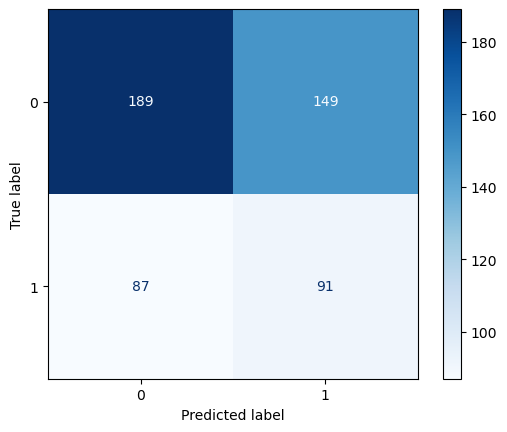

In [85]:
scores.append(evaluation(X_test, y_test, rf5.predict(X_test), rf5))

# Confusion Matrix of Random Forest with Overweigh
____

Youth who stayed homeless more than 1 year as our target / positive outcome:

* Our model correctly predicted 189 times that the youth did not stay homeless more than 1 year.
* Our model incorrectly predicted 149 times that youth stayed homeless more than 1 year when they actually did not.
* Our model incorrectly predicted 87 times that youth did not stay homeless more than 1 year when they actually did.
* Our model correctly predicted 91 times that youth stayed homeless more than 1 year.

The model shows more capability in identifying negative cases than positive cases.

* For balanced accuracy, the model's overall performance in terms of correctly classifying both positive and negative cases is moderate.
* For recall, the model correctly identified approximately 51% of the youth who stayed homeless more than 1 year.
* For out of all the cases predicted as youth staying homeless more than 1 year, approximately 38% were actually true positives.
* For the F1 score, it is moderately skewed towards in correctly identifying the negative cases (youth who did not stay homeless more than 1 year).

In [86]:
pd.DataFrame(scores, index=['rf', 'RandomOverSampler', 'SMOTEN', 'ADASYN', 'Weightedrf'])

,balanced_accuracy,recall,precision,f1_score
rf,0.533974,0.168539,0.468750,0.247934
RandomOverSampler,0.579882,0.500000,0.436275,0.465969
SMOTEN,0.546323,0.426966,0.402116,0.414169
ADASYN,0.548052,0.584270,0.386617,0.465324
Weightedrf,0.535204,0.511236,0.379167,0.435407
